# Lecture06 - Estuary circulation and Freshwater outflows: example of CT River
<div class="alert alert-block alert-success">
<b>Learning Objectives:</b> river estuary, river charge & tidal effects on stratification - 4 types of estuaries, exchange flow, salt balance, river plume morphology (e.g., front, bulge, coastal current), CT river estuary stratification, river plume instability and mixing
</div>

Before class:

- Read the GroupProject_guidelines.ipynb carefully and form your group of 2-3 people for the final group project.

After class:

- Watch the amazing [Coastal Perspectives Lecture "A Tale of Two Estuaries" by Patrick Lynch](https://uconn-cmr.webex.com/recordingservice/sites/uconn-cmr/recording/865f4206b27a103cafffa679eb729e86/playback) if you haven't yet! (strongly recommand)

Reference:

- Valle-Levinson, Contemporary Issues in Estuarine Physics, Cambridge University Press
- BS 9.2, Horner-Devine et. al., 2015
- Hansen and Rattray, Gravitational circulation in straits and estuaries, J Mar Res, 1965
- MacCready and Geyer, Advances in estuarine physics, Ann Rev Mar Sci , 2010
- Geyer and MacCready , The estuarine circulation , Ann Rev Fluid Mech , 2014

# 1. Estuary
>An estuary is (a) semi
enclosed and coastal body of water, (b)
with free communication to the ocean, and (c) within which
ocean water is diluted by freshwater derived from land. -- Cameron and Pritchard (1963)

Estuaries harbor unique plant and animal communities because their waters are **brackish** — a mixture of fresh water draining from the land and salty seawater.

Estuaries are some of the **most productive ecosystems** in the world. Many animal species rely on estuaries for food and as places to nest and breed. Human communities also rely on estuaries for food, recreation, and jobs.

Of the 32 largest cities in the world, 22 are located on estuaries. Not surprisingly, human activities have led to a decline in the health of estuaries, making them one of the most threatened ecosystems on Earth. 

## 1) CT river estuary

The Connecticut River produces 70% of Long Island Sound's fresh water, discharging at 18,400 cubic feet (520 m$^3$) per second (compare to the Amazon River discharge ~ 200,000 m$^3$/s). The Connecticut River is the longest tidal river in the northeastern United States. With its headwaters in the Connecticut Lakes region of New Hampshire near the Canadian border, it flows for 410 miles before discharging into Long Island Sound. The tidal segment of the river and associated tidal wetlands are a haven for fish, wildlife, and plants including the endangered shortnose sturgeon, American bittern, and Parker’s pipewort. As the only major river in the Northeast without a large port or harbor at its mouth, the Lower Connecticut River remains relatively undisturbed by development and offers a variety of nature-based outdoor recreational opportunities. 

<!-- ![](../figures/lecture06/CTriver_landcover.png) -->
<img src="../figures/lecture06/CTriver_landcover.png" width="600"> 
<!-- from Connecticut River Flow Restoration Study report -->

<!-- ![](../figures/lecture06/WhiteRiver_discharge.png) -->
<img src="../figures/lecture06/WhiteRiver_discharge.png" width="600"> 
<!-- from Connecticut River Flow Restoration Study report -->

<!-- ![](../figures/lecture06/Graham.JPG) -->
<img src="../figures/lecture06/Graham.JPG" width="600"> 

[Airborn picture by Larissa Graham
during high river discharge
conditions after tropical storm
Irene. (should be during ebb tide, we will explain later)]



In [1]:
# %%capture

# # Install necessary packages and restart the kernel.
# !pip install pandas
# !pip install numpy
# !pip install matplotlib
# !pip install ipympl
# # resetart kernel
# import IPython
# IPython.Application.instance().kernel.do_shutdown(True) #automatically restarts kernel

In [2]:
# # to enable the jupyter widgets so that you can plot interactive figures
# from google.colab import output
# output.enable_custom_widget_manager()

In [3]:
# import python libraries
import pandas as pd
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt

In [4]:
# load salinity data at Essex and Old Lyme, CT, respectively
# Essex: https://waterdata.usgs.gov/monitoring-location/USGS-01194750/#dataTypeId=continuous-90860-698975713&period=P365D&showFieldMeasurements=true
# Old Lyme: https://waterdata.usgs.gov/monitoring-location/USGS-01194796/#dataTypeId=continuous-90860-1995605579&period=P365D&showFieldMeasurements=true
salinity_essex = pd.read_csv('../data/lecture06/Essex_salinity_202401005-20251005.txt', comment='#', sep='\t', header=1, names=['agency_cd', 'site_no', 'datetime', 'tz_cd', 'salinity_top', 'salinity_top_cd', 'salinity_bottom', 'salinity_bottom_cd'])
salinity_oldlyme = pd.read_csv('../data/lecture06/OldLyme_salinity_202401005-20251005.txt', comment='#', sep='\t', header=1, names=['agency_cd', 'site_no', 'datetime', 'tz_cd', 'salinity_top', 'salinity_top_cd', 'salinity_bottom', 'salinity_bottom_cd'])
salinity_oldlyme 

,agency_cd,site_no,datetime,tz_cd,salinity_top,salinity_top_cd,salinity_bottom,salinity_bottom_cd
0,USGS,1194796,2024-10-05 13:30,EDT,28.0,P,29.0,A
1,USGS,1194796,2024-10-05 13:45,EDT,27.0,P,29.0,A
2,USGS,1194796,2024-10-05 14:00,EDT,27.0,P,29.0,A
3,USGS,1194796,2024-10-05 14:15,EDT,28.0,P,29.0,A
4,USGS,1194796,2024-10-05 14:30,EDT,26.0,P,29.0,A
...,...,...,...,...,...,...,...,...
34977,USGS,1194796,2025-10-05 11:45,EDT,29.0,P,31.0,P
34978,USGS,1194796,2025-10-05 12:00,EDT,29.0,P,31.0,P
34979,USGS,1194796,2025-10-05 12:15,EDT,29.0,P,30.0,P
34980,USGS,1194796,2025-10-05 12:30,EDT,26.0,P,30.0,P


### a. stratification

(np.float64(20365.520833333332), np.float64(20366.520833333332))

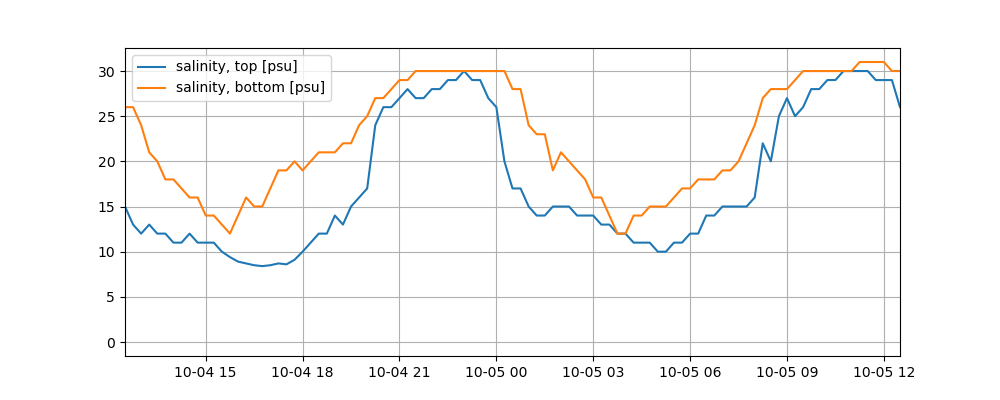

In [5]:
# plot salinity at river surface and bottom over a day, Old Lyme
%matplotlib widget 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
ax.plot(pd.to_datetime(salinity_oldlyme.datetime), salinity_oldlyme.salinity_top, label='salinity, top [psu]')
ax.plot(pd.to_datetime(salinity_oldlyme.datetime), salinity_oldlyme.salinity_bottom, label='salinity, bottom [psu]')
ax.grid(True) # add grids
ax.legend() # add legends
ax.set_xlim([pd.to_datetime('2025-10-04 12:30'), pd.to_datetime('2025-10-05 12:30')])

(np.float64(20088.520833333332), np.float64(20089.520833333332))

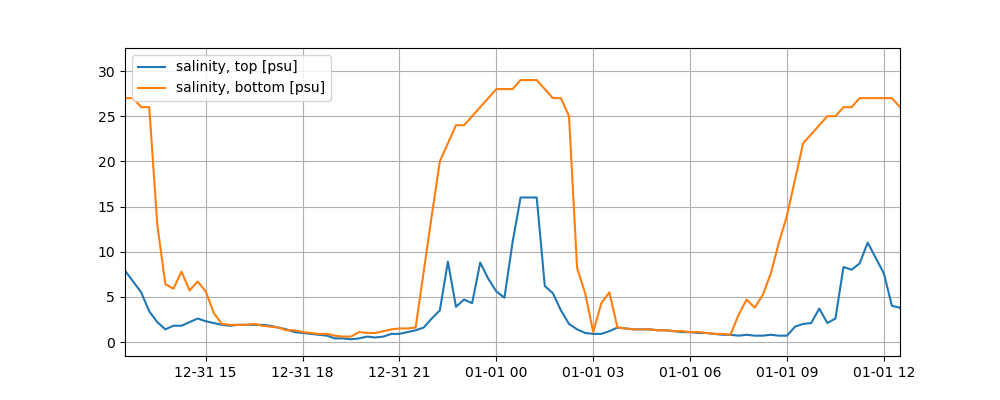

In [14]:
# plot salinity at river surface and bottom over a day, Old Lyme
%matplotlib widget 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
ax.plot(pd.to_datetime(salinity_oldlyme.datetime), salinity_oldlyme.salinity_top, label='salinity, top [psu]')
ax.plot(pd.to_datetime(salinity_oldlyme.datetime), salinity_oldlyme.salinity_bottom, label='salinity, bottom [psu]')
# ax.plot(pd.to_datetime(gauge_height_oldlyme.datetime), gauge_height_oldlyme.salinity_bottom, label='salinity, bottom [psu]')
ax.grid(True) # add grids
ax.legend() # add legends
ax.set_xlim([pd.to_datetime('2024-12-31 12:30'), pd.to_datetime('2025-01-01 12:30')])

(np.float64(20169.520833333332), np.float64(20170.520833333332))

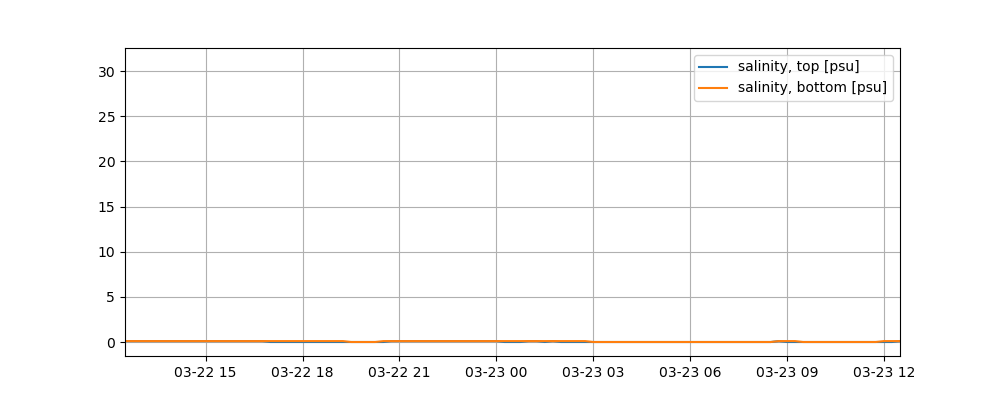

In [6]:
# plot salinity at river surface and bottom over a day, Old Lyme
%matplotlib widget 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
ax.plot(pd.to_datetime(salinity_oldlyme.datetime), salinity_oldlyme.salinity_top, label='salinity, top [psu]')
ax.plot(pd.to_datetime(salinity_oldlyme.datetime), salinity_oldlyme.salinity_bottom, label='salinity, bottom [psu]')
ax.grid(True) # add grids
ax.legend() # add legends
ax.set_xlim([pd.to_datetime('2025-03-22 12:30'), pd.to_datetime('2025-03-23 12:30')])
# ax.set_ylim([0, 2])

(np.float64(20230.520833333332), np.float64(20231.520833333332))

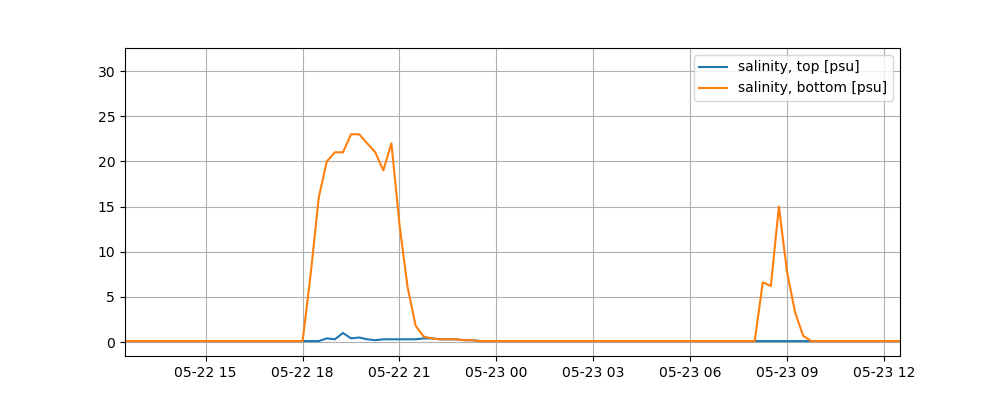

In [16]:
# plot salinity at river surface and bottom over a day, Old Lyme
%matplotlib widget 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
ax.plot(pd.to_datetime(salinity_oldlyme.datetime), salinity_oldlyme.salinity_top, label='salinity, top [psu]')
ax.plot(pd.to_datetime(salinity_oldlyme.datetime), salinity_oldlyme.salinity_bottom, label='salinity, bottom [psu]')
ax.grid(True) # add grids
ax.legend() # add legends
ax.set_xlim([pd.to_datetime('2025-05-22 12:30'), pd.to_datetime('2025-05-23 12:30')])
# ax.set_ylim([0, 2])

### b. tidal varibility

In [8]:
# load gaugeheight data at Essex and Old Lyme, CT, respectively
# Essex: https://waterdata.usgs.gov/monitoring-location/USGS-01194750/#dataTypeId=continuous-90860-698975713&period=P365D&showFieldMeasurements=true
# Old Lyme: https://waterdata.usgs.gov/monitoring-location/USGS-01194796/#dataTypeId=continuous-90860-1995605579&period=P365D&showFieldMeasurements=true
gaugeheight_essex = pd.read_csv('../data/lecture06/Essex_gaugeheight_202401005-20251005.txt', comment='#', sep='\t', header=1, names=['agency_cd', 'site_no', 'datetime', 'tz_cd', 'gauge_height', 'gauge_height_cd'])
gaugeheight_oldlyme = pd.read_csv('../data/lecture06/OldLyme_gaugeheight_202401005-20251005.txt', comment='#', sep='\t', header=1, names=['agency_cd', 'site_no', 'datetime', 'tz_cd', 'gauge_height', 'gauge_height_cd'])
gaugeheight_oldlyme 

,agency_cd,site_no,datetime,tz_cd,gauge_height,gauge_height_cd
0,USGS,1194796,2024-10-05 13:30,EDT,3.18,A
1,USGS,1194796,2024-10-05 13:35,EDT,3.16,A
2,USGS,1194796,2024-10-05 13:40,EDT,3.13,A
3,USGS,1194796,2024-10-05 13:45,EDT,3.10,A
4,USGS,1194796,2024-10-05 13:50,EDT,3.08,A
...,...,...,...,...,...,...
104535,USGS,1194796,2025-10-05 12:35,EDT,1.64,P
104536,USGS,1194796,2025-10-05 12:40,EDT,1.56,P
104537,USGS,1194796,2025-10-05 12:45,EDT,1.46,P
104538,USGS,1194796,2025-10-05 12:50,EDT,1.40,P


(np.float64(20365.520833333332), np.float64(20366.520833333332))

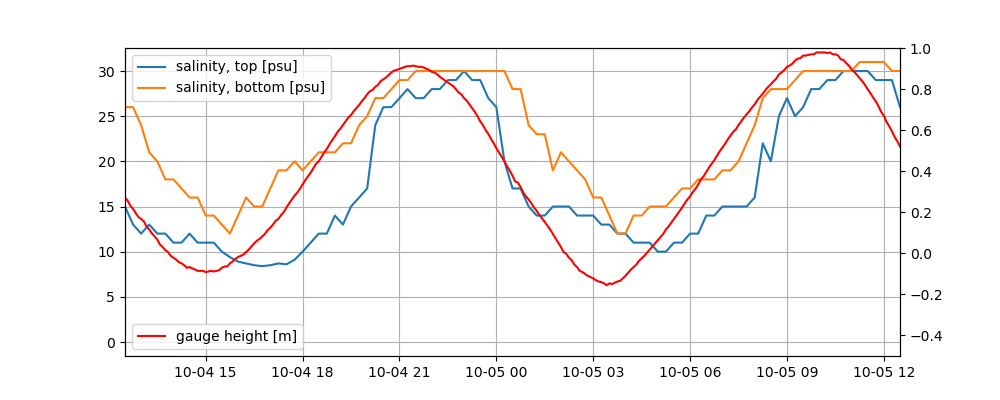

In [9]:
# plot salinity at river surface and bottom over a day, Old Lyme
%matplotlib widget 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
ax.plot(pd.to_datetime(salinity_oldlyme.datetime), salinity_oldlyme.salinity_top, label='salinity, top [psu]')
ax.plot(pd.to_datetime(salinity_oldlyme.datetime), salinity_oldlyme.salinity_bottom, label='salinity, bottom [psu]')
ax.grid(True) # add grids
ax.legend() # add legends

# plot meters instead of feet
ax1 = ax.twinx()
ax1.plot(pd.to_datetime(gaugeheight_oldlyme.datetime), gaugeheight_oldlyme.gauge_height*.3048, 'r', label='gauge height [m]')
ax1.set_ylim([-.5, 1])
ax1.legend(loc="lower left") # add legends

ax.set_xlim([pd.to_datetime('2025-10-04 12:30'), pd.to_datetime('2025-10-05 12:30')])

(np.float64(20088.520833333332), np.float64(20089.520833333332))

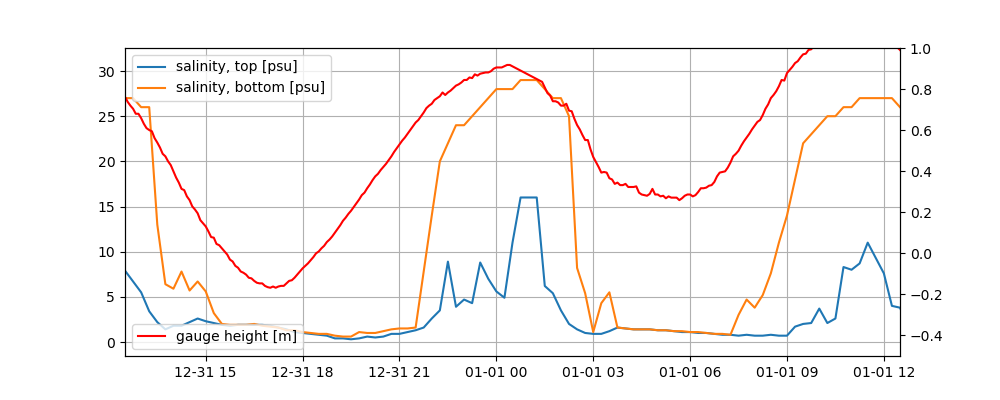

In [15]:
# plot salinity at river surface and bottom over a day, Old Lyme
%matplotlib widget 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
ax.plot(pd.to_datetime(salinity_oldlyme.datetime), salinity_oldlyme.salinity_top, label='salinity, top [psu]')
ax.plot(pd.to_datetime(salinity_oldlyme.datetime), salinity_oldlyme.salinity_bottom, label='salinity, bottom [psu]')
ax.grid(True) # add grids
ax.legend() # add legends

# plot meters instead of feet
ax1 = ax.twinx()
ax1.plot(pd.to_datetime(gaugeheight_oldlyme.datetime), gaugeheight_oldlyme.gauge_height*.3048, 'r', label='gauge height [m]')
ax1.set_ylim([-.5, 1])
ax1.legend(loc="lower left") # add legends

ax.set_xlim([pd.to_datetime('2024-12-31 12:30'), pd.to_datetime('2025-01-01 12:30')])

(np.float64(20230.520833333332), np.float64(20231.520833333332))

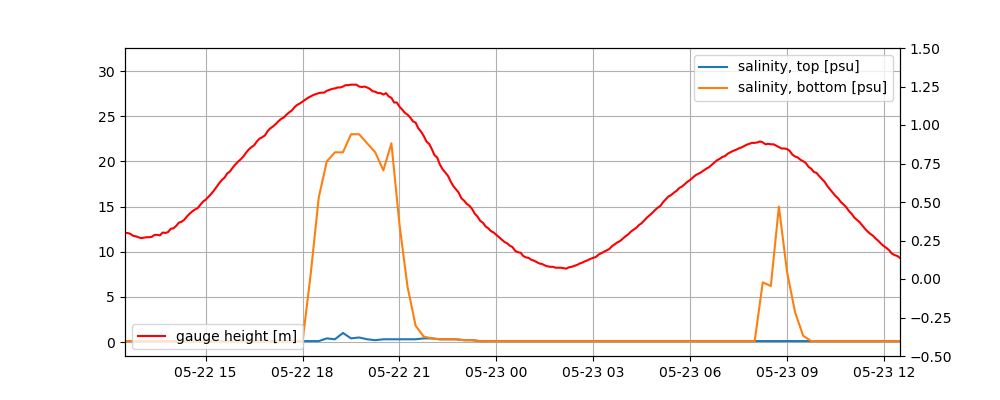

In [10]:
# plot salinity at river surface and bottom over a day, Old Lyme
%matplotlib widget 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
ax.plot(pd.to_datetime(salinity_oldlyme.datetime), salinity_oldlyme.salinity_top, label='salinity, top [psu]')
ax.plot(pd.to_datetime(salinity_oldlyme.datetime), salinity_oldlyme.salinity_bottom, label='salinity, bottom [psu]')
ax.grid(True) # add grids
ax.legend() # add legends

# plot meters instead of feet
ax1 = ax.twinx()
ax1.plot(pd.to_datetime(gaugeheight_oldlyme.datetime), gaugeheight_oldlyme.gauge_height*.3048, 'r', label='gauge height [m]')
ax1.set_ylim([-.5, 1.5])
ax1.legend(loc="lower left") # add legends

ax.set_xlim([pd.to_datetime('2025-05-22 12:30'), pd.to_datetime('2025-05-23 12:30')])


### c. seasonality

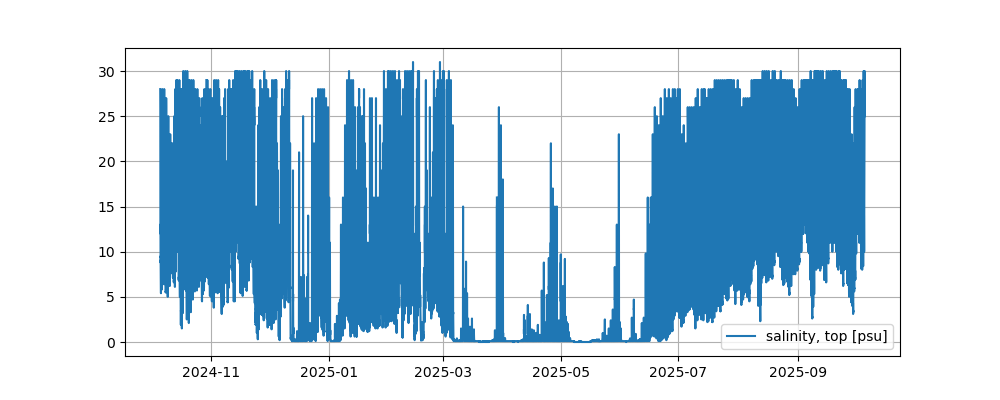

In [11]:
# plot salinity at river surface over an entire year, Old Lyme
%matplotlib widget 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
ax.plot(pd.to_datetime(salinity_oldlyme.datetime), salinity_oldlyme.salinity_top, label='salinity, top [psu]')
# ax.plot(pd.to_datetime(salinity_oldlyme.datetime), salinity_oldlyme.salinity_bottom, label='salinity, bottom [psu]')
ax.grid(True) # add grids
ax.legend() # add legends
# ax.set_xlim([pd.to_datetime('2025-10-04 12:30'), pd.to_datetime('2025-10-05 12:30')])

### d. longitudinal salinity variation

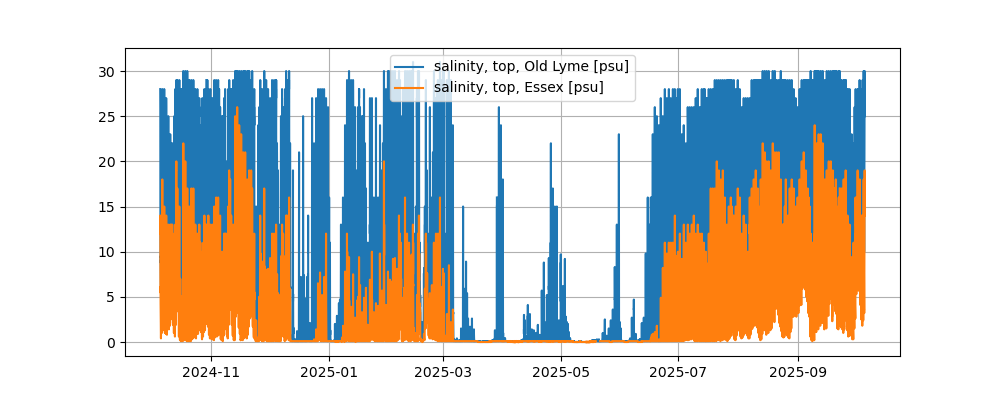

In [12]:
# plot salinity at river surface over an entire year, Old Lyme vs Essex
%matplotlib widget 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
ax.plot(pd.to_datetime(salinity_oldlyme.datetime), salinity_oldlyme.salinity_top, label='salinity, top, Old Lyme [psu]')
ax.plot(pd.to_datetime(salinity_essex.datetime), salinity_essex.salinity_top, label='salinity, top, Essex [psu]')
ax.grid(True) # add grids
ax.legend() # add legends
# ax.set_xlim([pd.to_datetime('2025-10-04 12:30'), pd.to_datetime('2025-10-05 12:30')])

(np.float64(20364.520833333332), np.float64(20366.520833333332))

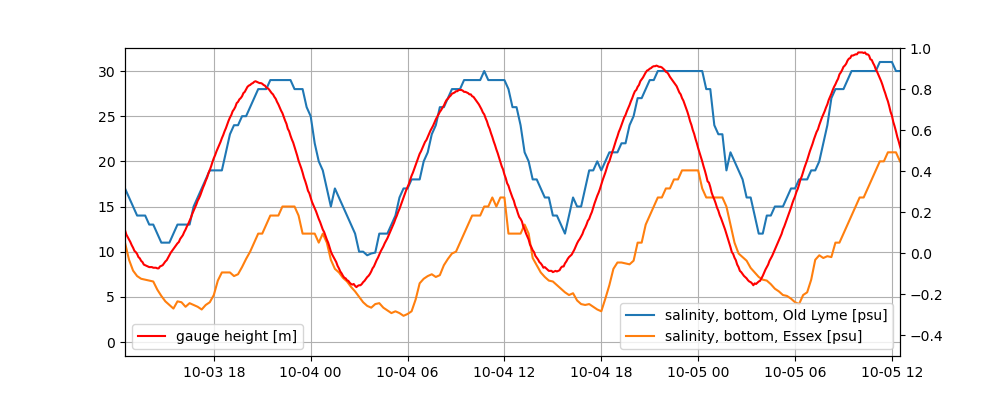

In [13]:
# plot salinity at river bottom over a few days, Old Lyme vs Essex
%matplotlib widget 
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10,4))
ax.plot(pd.to_datetime(salinity_oldlyme.datetime), salinity_oldlyme.salinity_bottom, label='salinity, bottom, Old Lyme [psu]')
ax.plot(pd.to_datetime(salinity_essex.datetime), salinity_essex.salinity_bottom, label='salinity, bottom, Essex [psu]')
ax.grid(True) # add grids
ax.legend() # add legends

# plot meters instead of feet
ax1 = ax.twinx()
ax1.plot(pd.to_datetime(gaugeheight_oldlyme.datetime), gaugeheight_oldlyme.gauge_height*.3048, 'r', label='gauge height [m]')
ax1.set_ylim([-.5, 1])
ax1.legend(loc="lower left") # add legends

ax.set_xlim([pd.to_datetime('2025-10-03 12:30'), pd.to_datetime('2025-10-05 12:30')])

The salinity gradient generally increases from the input source of an estuary, usually a stream or river, to the output source, the sea or ocean. Salinity is measured in gravimetrically as parts per thousand of solids in liquid or ppt.  The salinity of the ocean is generally around 35 ppt (Antonov 2006). Another salinity unit is the practical salinity unit or PSU measurement, which is based on water temperature and conductivity measurements made by sondes and the ocean is also generally around 35 PSU (Antonov 2006). Using ppt or PSU gives similar results for the ocean’s seawater salt content (Antonov 2006).

<!-- ![](../figures/lecture06/Tidal-wetlands-along-an-estuarine-salinity-gradient-which-can-be-classified-into-four.png) -->

<img src="../figures/lecture06/Tidal-wetlands-along-an-estuarine-salinity-gradient-which-can-be-classified-into-four.png" width="800"> 
<!-- https://www.researchgate.net/publication/320789576_Impacts_of_increasing_salinity_and_inundation_on_rates_and_pathways_of_organic_carbon_mineralization_in_tidal_wetlands_a_review -->


Tidal wetlands along an estuarine salinity gradient, which can be classified into four types according to salinity and tidal influence (Odum, 1988): (i) nontidal water marshes and forests, (ii) tidal freshwater marshes and forests (salinity < 0.5 ppt), (iii) brackish marsh and forest (salinity: 0.5–18 ppt), and (iv) salt marshes and mangrove swamps (salinity: 18–30 ppt); brackish wetlands can be further divided into oligohaline (salinity: 0.5–5 ppt) and mesohaline (5–18 ppt) components (Luo et al., 2019)

<!-- ![](../figures/lecture06/CTRiver_salinity-01.png) -->

<img src="../figures/lecture06/CTRiver_salinity-01.png" width="800"> 

Timeseries plots of maximum daily salinity on the lower Connecticut River 2011-2021 for an upstream site on the river and a downstream site in the estuary. The timeseries chart uses tiles to show annual patterns in salinity compared across 10 years. At the upstream site, Essex CT (01194750), freshwater dominates the beginning of the year up until May, with some moments of low salinity levels (oligohaline). Starting in June, the upstream site increases in salinity, with moderate salinity levels (mesohaline) through November. At the downstream site, salinity levels are high (polyhaline) for the majority of the year, with short periods of freshwater during April. This reflects the timing of snowmelt and increased streamflow. Across years, the upstream site appears to be getting saltier earlier. There is no obvious trend across years at the downstream site. A map indicates that the two sites are relatively close (~6 km apart) in the Long Island Sound and surrounded by tidal marshes that require certain levels of salinity. (https://www.usgs.gov/media/images/maximum-daily-salinity-lower-connecticut-river-2011-2021)


## 2). Estuary type

### a. Classification of estuaries on the basis of water balance

<!-- ![](../figures/lecture06/estuary_type_water_balance.png) -->

<img src="../figures/lecture06/estuary_type_water_balance.png" width="800"> 
<!-- valle-levinson chapter 1 -->

<!-- Freshwater removal could be the result of an excess of evaporation over precipitation (e.g., the Red Sea
(PHILLIPS, 1966) the Mediterranean, the Arabian Gulf (HUNTER, 1983), the Adriatic (ZORE-ARMANDA, 1969) and, in the Southern Hemisphere, the South Australian gulfs (NuNES and LENNON, 1986; Dr SILVA SAMARASINGHE, 1987) and Shark Bay) or achieved by freezing and the production of sea-ice (e.g., Weddell Sea (FoSTER and CAe, MACK, 1976; FOLDWK et al., 1985), the Ross Sea (MACAYEAL, 1985) and the Beaufort Sea (NEwBURY, 1986; AAGARD et al., 1985)).  -->
**Positive estuaries** are those in which freshwater additions from river
discharge, rain and ice melting exceed freshwater losses from evaporation or 
freezing and establish a longitudinal density gradient. In positive estuaries, the
longitudinal density gradient drives a net volume outflow to the ocean, as denoted
by stronger surface outflow than near-bottom inflow, in response to the supplementary
freshwater. The circulation induced by the volume of fresh water added to
the basin is widely known as “estuarine” or “gravitational” circulation.

**Inverse estuaries** are typically found in arid regions where freshwater losses from
evaporation exceed freshwater additions from precipitation. There is no or scant
river discharge into these systems. They are called inverse, or negative, because
the longitudinal density gradient has the opposite sign to that in positive estuaries,
i.e., water density increases landward. Inverse estuaries exhibit net volume inflows
associated with stronger surface inflows than near-bottom outflows. Water losses
related to inverse estuaries make their flushing more sluggish than positive estuaries.
Because of their relatively sluggish flushing, negative estuaries are likely
more prone to water quality problems than positive estuaries. - e.g., upper Gulf of California

**Low-inflow estuaries** also occur in regions of high evaporation rates but with a
small (on the order of a few m$^3$/s) influence from river discharge. During the dry and
hot season, evaporation processes may cause a salinity maximum zone (sometimes 
referred to as a salt plug, e.g., Wolanski, 1986) within these low-inflow estuaries.
Seaward of this salinity maximum, the water density decreases, as in an inverse
estuary. Landward of this salinity maximum, the water density decreases, as in
a positive estuary. Therefore, the zone of maximum salinity acts as a barrier that
precludes the seaward flushing of riverine waters and the landward intrusion of
ocean waters. Because of their weak flushing in the region landward of the salinity
maximum, low-inflow estuaries are also prone to water quality problems.

<img src="../figures/lecture06/low-inflow-estuaries.webp" width="800"> 
(https://link.springer.com/article/10.1007/s12237-023-01271-1)
Global map showing long-term annual average runoff (mm/year) calculated for half-degree grid cells for 1961–1990 (“climate normal” period), from UNESCO World Water Assessment Programme (https://en.unesco.org/wwap) following Center for Environmental Systems Research, University of Kassel (April 2002–Water GAP 2.1D). Yellow areas are persistently arid with occasional flow events; light blue areas have moderate runoff that is typically seasonal, e.g., Mediterranean-climate regions on mid-latitude west coasts. Red dots denote example regions of low inflow estuaries.


### b. Classification of estuaries on the basis of geomorphology

<!-- ![](../figures/lecture06/estuary_type_geomorphology.png) -->

<img src="../figures/lecture06/estuary_type_geomorphology.png" width="800"> 
<!-- valle-levinson chapter 1 -->

**Coastal plain estuaries**, also called drowned river valleys, are those that were formed as a result of the Pleistocene
increase in sea level, starting ~15,000 years ago. Originally rivers, these estuaries
formed during flooding over several millennia by rising sea levels. Their shape
resembles that of present-day rivers, although much wider. They are typically wide
(on the order of several kilometers) and shallow (on the order of 10 m), with large
width/depth aspect ratios. Examples of these systems are Chesapeake Bay and
Delaware Bay on the eastern coast of the United States.

**Fjords** are associated with high latitudes where glacial activity is intense. They
are characterized by an elongated, deep channel with a sill. The sill is related to a 
moraine of either a currently active glacier or an extinct glacier. Fjords are deep (several hundreds of
meters) and narrow (several hundreds of meters) and have low width/depth aspect
ratios with steep side walls. Fjords are found in Greenland, Alaska, British
Columbia, Scandinavia, New Zealand, Antarctica and Chile.

**Bar-built estuaries**, originally embayments, became semienclosed because of littoral
drift causing the formation of a sand bar or spit between the coast and the ocean.
Some of these bars are joined to one of the headlands of a former embayment and
display one small inlet (on the order of a few hundred meters) where the estuary
communicates with the ocean. Examples of bar-built estuaries abound in subtropical regions of
the Americas (e.g., North Carolina, Florida, northernMexico) and southern Portugal.

**Tectonic estuaries** were formed by earthquakes or by fractures of the Earth’s crust,
and creases that generated faults in regions adjacent to the ocean. Faults cause part
of the crust to sink, forming a hollow basin. An estuary is formed when the basin
is filled by the ocean. Examples of this type of estuary are San Francisco Bay in the
United States, Manukau Harbour in New Zealand, Guaymas Bay in Mexico and
some Rias in NwSpain.



## 3). Salt balance

By considering the mass & salt budgets over an esturine basin (where riverine input flows out to fill estuaries before connecting with the sea), we can predict the size of exchange flow at the sill/strait or mouth [Knudsen, 1900].

<!-- ![](../figures/lecture06/esturine_basin.jpg) -->

<img src="../figures/lecture06/esturine_basin.jpg" width="800"> 

- $R$ is the riverine input;
- $Q_U$ and $Q_L$ are the transport of mass at the upper ($U$) and lower ($L$) layers;
- $S_U$ and $S_L$ are the salinity of the upper and lower layers.
  
<div class="alert alert-block alert-warning">
<b>Chalk talk and Discussion:</b> Combine the principles of mass and salt conservation to derive expressions for $Q_U$ and $Q_L$ (Knudsen relations), and discuss the implications for two-layer estuarine exchange circulation. Tips: consider the role of mixing and along-estuary variations
</div>

The relations for $Q_U$ and $Q_L$, known as Knudsen relations, allow us to draw some conclusions about the 2-layer circulation:
- For ($S_L$ - $S_U$) > 0, the lower layer flow has opposite sign to the upper layer;
- Mixing reduces ($S_L$ - $S_U$) and increases ($Q_L$ + $Q_U$) along the estuary. By measuring salinity profiles in different coordinates along the estuarine channel we can quantify the mixing that occurs in the zone between the profiles;
- Near the ocean ($S_L$ - $S_U$) will be smaller and hence the fluxes will be larger;
- The along-estuary difference in the inflowing water, $Q_L$, must equal the amount of water mixed vertically into the upper layer.


## 4). Stratification and Mixing

According to water column stratification or salinity vertical structure, estuaries can
be classified as **salt wedge, strongly stratified, weakly stratified or vertically mixed**. This classification considers the
**competition between buoyancy forcing from river discharge and mixing from
tidal forcing** (Fig. 1.3). Mixing from tidal forcing is proportional to the volume of
oceanic water entering the estuary during every tidal cycle, which is also known as
the tidal prism. 

Large river discharge and weak tidal forcing results in **salt wedge**
estuaries such as the Mississippi (USA), Rio de la Plata (Argentina), Vellar (India),
Ebro (Spain), Pánuco (Mexico), and Itajaí-Açu (Brazil). The Connecticut River is a tidal salt wedge estuary. 
These systems are strongly
stratified during **flood** tides, when the ocean water intrudes in a wedge shape. Typical tidally averaged salinity profiles exhibit a sharp **pycnocline** (or halocline), with
mean flows dominated by outflow throughout most of the water column and weak
inflow in a near-bottom layer. The mean flow pattern results from relatively weak
mixing between the inflowing ocean water and the river water.

Moderate to large river discharge and weak to moderate tidal forcing result
in **strongly stratified estuaries** (Fig. 1.3). These estuaries have similar stratification
to salt wedge estuaries, but the stratification remains strong throughout the tidal
cycle as in fjords and other deep (typically >20m deep) estuaries. The mean flow exhibits well-established
outflows and inflows, but the inflows are weak because of weak mixing with
freshwater and weak horizontal density gradients.

**Weakly stratified or partially mixed estuaries** result from moderate to strong
tidal forcing and weak to moderate river discharge. Many temperate estuaries,
such as Chesapeake Bay, Delware Bay and James River (all in the eastern United
States) fit into this category. The mean salinity profile either has a weak pycnocline
or continuous stratification from surface to bottom, except near the bottom mixed
layer. The **mean exchange flow** is most vigorous (when compared to other types
of estuaries) because of the **mixing** between riverine and oceanic waters.

Strong tidal forcing and weak river discharge result in vertically **mixed estuaries**.
Mean salinity profiles in mixed estuaries are practically uniform and mean flows are
unidirectional with depth. 

<!-- ![](../figures/lecture06/salinity_structure.png) -->

<img src="../figures/lecture06/salinity_structure.png" width="800"> 

It is essential to keep in mind that many systems **may change** from one type to
another in consecutive tidal cycles, or from month to month, or from season to
season, or from one location to another inside the same estuary. For instance, the
Hudson River changes from highly stratified during
neap tides to weakly stratified during spring tides.

<!-- ![](../figures/lecture06/neap_spring.png) -->

<img src="../figures/lecture06/neap_spring.png" width="600"> 


## 5). Exchange flow in partially stratified estuaries

The tidally averaged circulation of many estuaries has two extraordinary features. 

First, despite the
net seaward flow due to the river through any cross-section, the deeper half of the water typically
flows **landward**, as shown schematically in Figure 1a. This inflow gradually rises and joins the
river flowing **outward** in the upper half of the estuary, resulting in an overall pattern called the
**exchange flow**. The persistent inflow at depth and associated strong stratification traps particles,
larvae, nutrients, and low-oxygen water, giving rise to both the high biological productivity and
persistent water-quality problems that characterize estuaries worldwide. 

Second, the volume flux
of the exchange flow is often **many times greater** than that of the river alone. The corresponding
salinity field (Figure 1b) has a gradual **along-channel salinity gradient**, from oceanic to fresh,
because the deep inflowing ocean water is continually freshened by vertical turbulent mixing with
the fresher water above. Here, the turbulence is driven by the tides.

<!-- ![](../figures/lecture06/exchange_flow_sketch.png) -->

<img src="../figures/lecture06/exchange_flow_sketch.png" width="600"> 


# 2. River Plume

River plumes are generated by the flow of buoyant river water into the coastal
ocean, where they significantly influence water properties and circulation. 

- In the source region, the buoyancy and momentum that initiate a river plume are determined
by estuarine processes, which are responsible for the initial transformation of river
discharge. The salinity, thickness, and turbulent mixing rates
of the near-field river plume are set by the competition between the stratifying influence
of river discharge and the mixing provided by tidal energy within the estuary. 
In strongly forced systems, the estuarine discharge separates from the bottom near the 
river mouth and forms the buoyant layer. The liftoff point is the location of the bottom attached
salt front where the upper layer loses contact with the bottom. 

- The river plume accelerates into a jet-like near-field region beginning at liftoff,
or at the river mouth if liftoff occurs within the estuary.

- The river plume begins to shoal and widen, leading to deceleration as it enters the mid-field region. This is where the inflowing river water transitions from the inertial near-field jet into a geostrophic or wind-dominated far-field plume. Lateral spreading is arrested, inflow momentum is lost, and plume dynamics become increasingly influenced by Earth’s rotation.

<!-- ![](../figures/lecture06/plume_sketch.png) -->

<img src="../figures/lecture06/plume_sketch.png" width="600"> 

- Finally, the far field is the region beyond the mid-field in which the plume no longer has a
memory of the initial momentum of the river discharge, and the dynamics are primarily governed
by Earth’s rotation, buoyancy, wind stress, and sometimes bottom stress. This region may extend
hundreds of kilometers from the mouth. When winds and ambient currents are not sufficient to
force the plume offshore, the far-field plume forms a geostrophic coastal current

<!-- ![](../figures/lecture06/plume_planview_sketch.png) -->

<img src="../figures/lecture06/plume_planview_sketch.png" width="600"> 


The fresh buoyant water that exits the Connecticut River mouth 
during each ebb tide expands as a plume, and floats above the denser waters of Long Island Sound. Currents in
the Sound flow back and forth along the coast each tide, pushing the plume along the shore first to the east and
then to the west. The location of the plume boundary (front) goes through a similar cycle almost every tide,
initially being held stationary by eastward tidal currents (ebb), then expanding freely around slack tide, and
subsequently being aided as it moves to the west by the ambient flow (flood). 

<!-- ![](../figures/lecture06/plume_ebb.png) -->

<img src="../figures/lecture06/plume_ebb.png" width="800"> 

# 3. Connectiuct River

The Connecticut River is the largest source of freshwater discharging into Long Island Sound, with a mean
discharge of about 500 m$^3$/s and spring freshet conditions that exceed 2000 m$^3$/s. The tidal range at
the mouth is 1–1.5 m and is predominantly semidiurnal, and tides propagate approximately 100 km up the
river to the dam near Thompsonville, CT. The estuary is relatively shallow, with multiple bedrock constrictions
of 300–400 m width and thalweg depths of 10–12 m separated by wider (700–1200 m), shallower
regions with maximum depths of 4–6 m. The modest cross-sectional area of the estuary leads to relatively
strong velocities due to the river discharge, corresponding to 0.16 and 0.7 m/s for the average flow and
typical freshet conditions. As a result of the shallow bathymetry and strong river velocities, the salinity intrusion
is relatively short, typically extending only 5–15 km from the mouth. By comparison, the Hudson River
is the next major drainage basin to the west and has a similar mean annual discharge, but its deeper
bathymetry results in a salinity intrusion that extends 30–100 km from the mouth. Under moderate to high
discharge conditions, the Connecticut is a tidal salt wedge characterized by strong horizontal salinity gradients
and strong stratification that varies tidally with frontal propagation during flood tides and intense
mixing during ebbs [Ralston et al., 2010]. 

<!-- The Connecticut is dynamically similar to other tidal salt wedge
estuaries that span a range of river discharges [Geyer and MacCready, 2014], including the Changjiang [Li
et al., 2014], Fraser [Geyer and Farmer, 1989], Skagit [Ralston et al., 2013], and Merrimack [Ralston et al.,
2010a] estuaries.  -->

## 1). Stratification in estuary and tidal effects

<!-- ![](../figures/lecture06/ebb_flood_CTriver.png) -->
<img src="../figures/lecture06/ebb_flood_CTriver.png" width="600"> 
[Ralston et al. 2017]

## 2). river plume

### a. Near field

<!-- ![](../figures/lecture06/CT_river_kh.png) -->

<img src="../figures/lecture06/CT_river_kh.png" width="800"> 


### b. mid field

<!-- ![](../figures/lecture06/CT_river_front.png) -->

<img src="../figures/lecture06/CT_river_front.png" width="800"> 

<!-- ![](../figures/lecture06/CT_river_lobe-and-cleft.png) -->

<img src="../figures/lecture06/CT_river_lobe-and-cleft.png" width="800"> 


# References:
Odum, W. E. (1988). Comparative ecology of tidal freshwater and salt marshes. Annual review of ecology and systematics, 147-176.

Luo, M., Huang, J. F., Zhu, W. F., & Tong, C. (2019). Impacts of increasing salinity and inundation on rates and pathways of organic carbon mineralization in tidal wetlands: a review. Hydrobiologia, 827(1), 31-49.

Knudsen, M., 1900. Ein hydrographischer Lehrsatz. Annalen der Hydrographie und
Maritimen Meteorologie 28, 316–320.

Ralston, D. K., Geyer, W. R., Lerczak, J. A., & Scully, M. (2010). Turbulent mixing in a strongly forced salt wedge estuary. Journal of Geophysical Research: Oceans, 115(C12).

Ralston, D. K., Cowles, G. W., Geyer, W. R., & Holleman, R. C. (2017). Turbulent and numerical mixing in a salt wedge estuary: Dependence on grid resolution, bottom roughness, and turbulence closure. Journal of Geophysical Research: Oceans, 122(1), 692-712.

